In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

In [11]:
def softmax(x1, scale):
    x2=x3=x4=0.5
    e = np.e
    s = pow(np.e, x1*scale) + pow(e,x2*scale)+pow(e,x3*scale)+pow(e,x4*scale)
    return pow(e, x1*scale) / s

In [8]:
softmax(0.5)

0.25

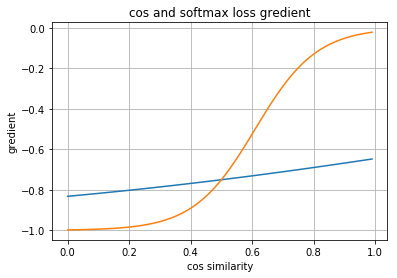

In [15]:
# Data for plotting
t = np.arange(0.0, 1.0, 0.01)
x = softmax(t, 1) -1
x_scale = softmax(t, 10)-1

fig, ax = plt.subplots()
ax.plot(t, x)
ax.plot(t, x_scale)

ax.set(xlabel='cos similarity', ylabel='gredient',
       title='cos and softmax loss gredient')
ax.grid()

fig.savefig("test.png")
plt.show()

transformer缩放的原因

In [93]:
def softmax(x, x1, d):
    e = np.e
    s = pow(e, x1)
    for i in range(d - 1):
        s = s+pow(e, x)
    return pow(e, x1) / s

In [107]:
def softmax_sqrt(x, x1, d):
    e = np.e
    x = x/22
    x1 = x1/22
    s = pow(e, x1)
    for i in range(d - 1):
        s = s+pow(e, x)
    return pow(e, x1) / s

In [82]:
def getDk(n):
    res = []
    for i in range(n):
        res.append(np.random.random())
    return res

In [85]:
np.dot(getDk(4), getDk(4))

0.7818990320560237

In [86]:
np.dot(getDk(512), getDk(512))

122.82856459545894

In [78]:
softmax(25, 4)

0.9996299076068291

In [79]:
softmax(25, 512)

0.9406785440800982

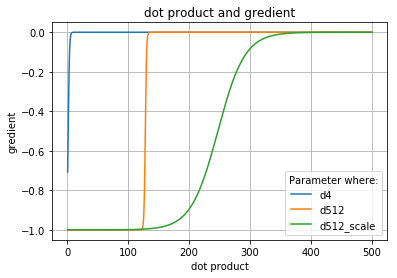

In [115]:
# Data for plotting
t = np.arange(1, 500.0, 0.1)
x = softmax(0.78, t, 4) - 1
x_d = softmax(122, t, 512) - 1
x_d_q = softmax_sqrt(122, t, 512) - 1

fig, ax = plt.subplots()
ax.plot(t, x, label='d4')
ax.plot(t, x_d, label='d512')
ax.plot(t, x_d_q, label='d512_scale')

ax.set(xlabel='dot product', ylabel='gredient',
       title='dot product and gredient')
ax.grid()
plt.legend(title='Parameter where:')
fig.savefig("test.png")
plt.show()